<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Stastical/kriging_regression_example_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 8.8 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565141 sha256=b33568e2ba78cc4f709ca40fd3f8511630ee19ce65c429436e5d5860c13cfc78
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=f8043e9be62ca314fb70aa6c4b16c482a51bbd599795b0d9e1159bc5cfd016b7
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [2]:
import unittest
import numpy as np
import GPy

from sklearn.metrics import r2_score # metrics to evaluate the model r2_score
from sklearn.metrics import mean_absolute_error # metrics to evaluate the model mean absolute error
from sklearn.metrics import mean_squared_error # metrics to evaluate the model mean squared error


In [3]:
# Ceate a dataset of 20 points adding 
# the dependent variable Y has a random uniform noisy
X = np.random.uniform(-3.,3.,(20,1))
Y = np.exp(X) + np.random.randn(20,1)*0.05

In [4]:
# We can choose different kenels including Gaussian and Matenr
# the Matern kern is a generalization of Gaussian kernel
# if you replace the Matern52 by RBF the code will work using Gaussian 
# but in both cases it is necessary to tune the parameters

#kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
kernel = GPy.kern.Matern52(input_dim=1)

In [5]:
# First part we define the model providing the kernel and dataset
m = GPy.models.GPRegression(X,Y,kernel)


In [6]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
Mat52.variance,1.0,+ve,
Mat52.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


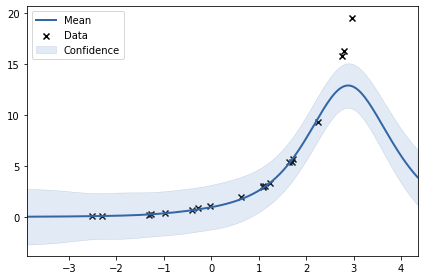

In [7]:
fig = m.plot()
# as observed in fig the stadard deviation without parameters tune are big 
# considering the confidence interval of values estimated

In [8]:
m.optimize(messages=True)
# in order to have a better results the fuction optimize is defined to tune the parameters
# ps: the default method to optimize is 'bfgs' (quasi newton method)

In [9]:
# once the fucntion optimize is defined the parameters of krig can be optimized 
# using optimize_restart
m.optimize_restarts(num_restarts = 10)

 /usr/local/lib/python3.7/dist-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = 10.659254462486796
Optimization restart 2/10, f = 10.6592544627856
Optimization restart 3/10, f = 10.659254464392792
Optimization restart 4/10, f = 10.659254460326
Optimization restart 5/10, f = 10.659254463841716
Optimization restart 6/10, f = 10.659254461172477
Optimization restart 7/10, f = 10.659254462818812
Optimization restart 8/10, f = 10.659254461737437
Optimization restart 9/10, f = 10.659254462883656
Optimization restart 10/10, f = 10.659254462388198


In [16]:
# all possible informations present in the model can be 
# listed using dir(model_name) ps: in our case the name is m
dir(m)

['Gaussian_noise',
 'Mat52',
 'X',
 'Y',
 'Y_metadata',
 'Y_normalized',
 '_Parameterizable__visited',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_io',
 '_add_parameter_name',
 '_add_to_index_operations',
 '_added_names_',
 '_allowed_failures',
 '_build_from_input_dict',
 '_checkgrad',
 '_connect_fixes',
 '_connect_parameters',
 '_default_constraint_',
 '_default_prior_',
 '_description_str',
 '_disconnect_parent',
 '_ensure_fixes',
 '_fail_count',
 '_fixes_',
 '_format_input_dict',
 '_format_spec',
 '_from_dict',
 '_get_original',
 '_gradient_array_',
 '_grads',
 '_has_fixes',

In [17]:
# noise in model:
m.Gaussian_noise

Gaussian_noise.,value,constraints,priors
variance,0.004394221308727562,+ve,


In [19]:
m.parameters

In [20]:
m.param_array

array([6.20714852e+03, 8.82565239e+00, 4.39422131e-03])

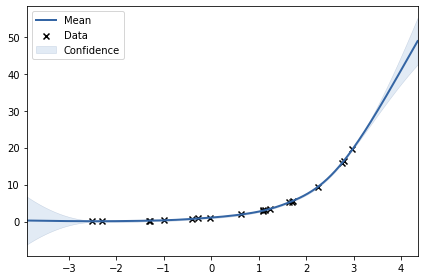

In [10]:
fig = m.plot()
# after optimize we can observe the confidence 
# interval sugest the model is tunned 
# after tune we can observe the confidence interval suggeting values close to experimental 
# in regions where there is experimental points. 

In [11]:
# obtaining the value of y_pred (y_mean) and standard deviation (y_std) for each point
y_mean, y_std = m.predict(X.reshape(-1, 1))

In [12]:
# writing the metrics:
print('r^2 score =',r2_score(Y, y_mean))
print('MAE =',mean_absolute_error(Y, y_mean))
print('MSQE =',mean_squared_error(Y, y_mean))

r^2 score = 0.9999377145051863
MAE = 0.032749462200354185
MSQE = 0.0020733056724676164
